# Flight Price Prediction

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Christopher Rebollar-Ramirez
- Licheng Hu
- Lucien Chen
- Steven Shi
- Jasdeep Sandhu

# Abstract

This study aims to investigate the key factors that influence the pricing of domestic flights originating from Los Angeles International Airport (LAX) and destined for major U.S. airports during the month of June. Our group believes June typically marks the beginning of the peak summer travel season which students start their summer break in the United States which would cause increased demand for air travel. Understanding how flight pricing fluctuates during this period could provide valuable insights into airline pricing strategies during high-demand periods and may ultimately help the reader understand what factors contribute the most to the price of their airline tickets. 

Our data was extracted from Expedia. Our analysis starts with data preprocessing to ensure quality and consistency. Through cleaning and filtering the raw data, we try to focus on variables such as travel duration, search date, flight date, and arrival airport to identify patterns and correlations that impact flight pricing. Our exploratory data analysis trys to uncover underlying patterns and trends with different varibles and flight pricing. In our analysis, we used machine learning techniques to create models to investigate the impact of each variable on flight prices. We used linear regression as our baseline model. We improved the accuarcy of the model by increasing complexity with a Random Forest algorithm and with hyperparameter tuning. In the final model, mean absolute error and root mean squared error both decreased dramatically.

In our feature importance plot from the final model, we discovered the most important features are the duration of the flight, followed by the cabin code, search date before the flights, the destination being JFK (surprisingly) and remaining seats with everything else following after. However, it seems that the distance between LAX and the destination doesn't matter nearly as much as we thought it would. In the future, it may make sense to take a deeper dive into how various destination airports affect the air fare. One possible hypothesis is that JFK is one of the busiest airports in New York City. As a result it has higher demand than other airports which drives the price of airline tickets up.

# Research Question

Which factors most significantly affect the pricing of domestic flights from LAX to major U.S. airports in the month of June, based on analysis of pulled data from Expedia on travel duration, search date, flight date, and arrival airport?

# Background and Prior Work

Nearly a billion people fly in the US alone every year, with the exception of covid.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Given how prevalent air travel is, we decided to conduct a deeper analysis on airline pricing. We decided to look at LAX specifically given that it is one of the busiest airports in California.

Tons of research has gone into examining different airline pricing strategies and factors that affect the cost of an air fare. In general, airlines, much like other businesses, cater their products toward different demographics of customers. People that travel for work or business are typically more flexible in regards to how they fly as well as less price-sensitive in comparison to leisure travelers.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) By taking advantage of this fact, airline companies are able to effectively segment their products which allows them to maximize their revenues. Airlines also take advantage of dynamic pricing algorithms to match fluctuations in demand. While demand does have some random variation, cyclical factors such as time of day, day of the week, or season, play a huge role in the price of an airfare.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) These pricing algorithms are able to capitalize on these flucations in demand and change the price of a ticket accordingly. Other strategies used by airlines include overbooking, poaching, etc.

1. <a name="cite_note-1"></a> [^](#cite_ref-1)Full year 2022 U.S. Airline Traffic Data. Full Year 2022 U.S. Airline Traffic Data | Bureau of Transportation Statistics. (n.d.). https://www.bts.gov/newsroom/full-year-2022-us-airline-traffic-data#:~:text=For%20the%20full%20year%202022,and%20388%20million%20in%202020. 

2. <a name="cite_note-2"></a> [^](#cite_ref-2)Poelt, S. (1970, January 1). Practical pricing and the airline industry. SpringerLink. https://link.springer.com/chapter/10.1057/9780230294776_15 

3. <a name="cite_note-3"></a> [^](#cite_ref-3)The algorithm behind plane ticket prices and how to get the best deal. USC Viterbi School of Engineering. (2019, November 13). https://illumin.usc.edu/the-algorithm-behind-plane-ticket-prices-and-how-to-get-the-best-deal/ 

# Hypothesis


We believe that the factors that most significantly impact the price of flights from LAX to other major U.S airports is the difference between the flight date and search date, and total distance/travel duration to destination. From our research, we learned that the price of airline tickets gets higher the closer you book to the flight date since the number of available seats decreases over time. Finally, the further or longer (in terms of time) a plane has to fly, the more costs will be incurred in gasoline and labor costs for staff, so we would expect that further flights are more expensive.

# Data

### Data overview

- Flight Prices
  - Dataset Name: flights_processed.csv
  - Link to the dataset: https://www.kaggle.com/datasets/dilwong/flightprices?resource=download
  - Number of observations: 305,251 (post processing)
  - Number of variables: 17 (post processing)

Our flight dataset has the columns named searchDate (Date format), flightDate (Date format), startingAirport (Date format), destinationAirport (Airport name), travelDuration (PT[HH]H[MM]M), isBasicEconomy (Bool), isNonStop (Bool), baseFare (USD, Float), totalFare (USD, Float), seatsRemaining (int), totalTravelDistance (Miles, Float), segmentsAirlineName (String), segmentsAirlineCode (Int), segmentsDurationInSeconds (Int), segmentsDistance (Miles, Int), and segmentsCabinCode (Int). Our most important variables would be baseFare and totalFare as we analyze which variables effect them. This will make the baseFare and totalFare variables our dependent variables. This will help us determine which factors significantly affect the pricing of domestic flights from LAX to major U.S. cities. To make the data more useable and cleaner, we will eliminate flights with missing information, convert any strings to numeric if necessary, and have consistent data on every flight in the dataset. We have also limited our dataset to June, as that is typically when school is finished so many people are travelling. This has reduced our dataset by nearly half, making it easier to modify. We can potentially apply linear regression to see what affects our dependent variable.

## Dataset #1 : Flight Prices

In [39]:
## The following was code used to process the original dataset
"""
import pandas as pd

#original dataset was 31 gb, too large to upload or process, so this was done on kaggle and split into chunks
chunk_size = 10000  # Size of each chunk
first_chunk = True

#this processing was done on kaggle to utilize their more powerful processing power, the original dataset was 31gb, which is too large to upload or processs
chunks = pd.read_csv('itineraries.csv', chunksize=chunk_size)

results = []

for chunk in chunks:
    #only consider flights from LAX
    chunk = chunk[chunk['startingAirport'] == 'LAX']
    #only consider June flights
    chunk = chunk[chunk['flightDate'].str.contains('-06-')]
    #only consider nonstop flights
    chunk = chunk[chunk['isNonStop'] == True]
    #drop unnecessary columns
    chunk = chunk.drop(['legId', 'fareBasisCode','elapsedDays', 'isRefundable',
                       'segmentsDepartureTimeEpochSeconds',
                       'segmentsDepartureTimeRaw','segmentsArrivalTimeEpochSeconds',
                       'segmentsArrivalTimeRaw','segmentsArrivalAirportCode','segmentsDepartureAirportCode'
                       ,'segmentsEquipmentDescription'], axis=1)
    processed_chunk = chunk

    #add to our new processed dataset
    if first_chunk:
        processed_chunk.to_csv('processed_file.csv', mode='w', index=False)
        first_chunk = False
    else:
        processed_chunk.to_csv('processed_file.csv', mode='a', index=False, header=False)
        break 
"""

"\nimport pandas as pd\n\n#original dataset was 31 gb, too large to upload or process, so this was done on kaggle and split into chunks\nchunk_size = 10000  # Size of each chunk\nfirst_chunk = True\n\n#this processing was done on kaggle to utilize their more powerful processing power, the original dataset was 31gb, which is too large to upload or processs\nchunks = pd.read_csv('itineraries.csv', chunksize=chunk_size)\n\nresults = []\n\nfor chunk in chunks:\n    #only consider flights from LAX\n    chunk = chunk[chunk['startingAirport'] == 'LAX']\n    #only consider June flights\n    chunk = chunk[chunk['flightDate'].str.contains('-06-')]\n    #only consider nonstop flights\n    chunk = chunk[chunk['isNonStop'] == True]\n    #drop unnecessary columns\n    chunk = chunk.drop(['legId', 'fareBasisCode','elapsedDays', 'isRefundable',\n                       'segmentsDepartureTimeEpochSeconds',\n                       'segmentsDepartureTimeRaw','segmentsArrivalTimeEpochSeconds',\n           

To wrangle our data, we only want to consider the flights from LAX, in June, nonstop flights, and comb unnecessary columns. When working on analyzing the data, we first want to eliminate the data that is useless when finding which factors most significantly affect the pricing of domestic flights from LAX to major U.S. airports in the month of June.

# Results

## Exploratory Data Analysis


## Initial Exploration

In [1]:
import seaborn as sns
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pickle
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("flights_processed.csv")
df['search_day_before_flights']=(pd.to_datetime(df['flightDate'])-pd.to_datetime(df['searchDate'])).dt.days
df['days']=df['flightDate'].apply(lambda x: pd.to_datetime(x).strftime('%A'))
df['flightDate'] = pd.to_datetime(df['flightDate']).dt.date
df['searchDate'] = pd.to_datetime(df['searchDate']).dt.date
df=df.drop(columns=['isNonStop','travelDuration','segmentsDistance'])

In [42]:
df.shape

(305250, 15)

In [43]:
df.dtypes

searchDate                    object
flightDate                    object
startingAirport               object
destinationAirport            object
isBasicEconomy                  bool
baseFare                     float64
totalFare                    float64
seatsRemaining                 int64
totalTravelDistance          float64
segmentsAirlineName           object
segmentsAirlineCode           object
segmentsDurationInSeconds      int64
segmentsCabinCode             object
search_day_before_flights      int64
days                          object
dtype: object

Our dataset contains 305250 data and 15 variables containing information about various flights on Expedia. We have __numeric variables__(baseFare, totalFare, seatsRemaining, totalTravelDistance, segmentsDurationInSeconds, segmentsDistance, search_day_before_flights, duration_seconds), __categorical variables__(searchDate, flightDate, startingAirport, destinationAirport, travelDuration, segmentsAirlineName, segmentsAirlineCode, segmentsCabinCode, days) and __boolean variables__ (isBasicEconomy)

In [3]:
df.describe()

,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDurationInSeconds,search_day_before_flights
count,305250.000000,305250.000000,305250.000000,285836.000000,305250.000000,305250.000000
mean,395.966037,441.834246,6.095574,1706.165735,14484.683440,26.939538
std,286.032648,306.290018,2.765178,815.630684,5553.747086,16.934928
min,2.000000,29.590000,0.000000,338.000000,4320.000000,1.000000
25%,231.630000,268.600000,4.000000,848.000000,9180.000000,12.000000
50%,372.000000,414.600000,7.000000,1943.000000,15840.000000,25.000000
75%,478.130000,528.590000,8.000000,2458.000000,19620.000000,42.000000
max,4435.350000,4782.600000,10.000000,2606.000000,20820.000000,60.000000


In [45]:
df.isna().mean()

searchDate                   0.0000
flightDate                   0.0000
startingAirport              0.0000
destinationAirport           0.0000
isBasicEconomy               0.0000
baseFare                     0.0000
totalFare                    0.0000
seatsRemaining               0.0000
totalTravelDistance          0.0636
segmentsAirlineName          0.0000
segmentsAirlineCode          0.0000
segmentsDurationInSeconds    0.0000
segmentsCabinCode            0.0000
search_day_before_flights    0.0000
days                         0.0000
dtype: float64

In [4]:
missing_date = df[df.isna().any(axis=1)]
missing_date['destinationAirport'].value_counts()

DFW    6412
ORD    4164
DTW    2686
ATL    1684
OAK    1421
PHL     960
EWR     641
JFK     510
SFO     242
DEN     236
BOS     161
CLT     112
MIA      80
IAD      65
LGA      40
Name: destinationAirport, dtype: int64

Since the destinationAirport has no missing value and our startingAirport are all from LAX, flights having the same startingAirport and destinationAirport should have similar travel distance, therefore we could estimate the missing value in totalTravelDistance by doing mean imputation from different destinationAirport. Moreover, all the flights with destinationAirport as LGA have missing values in totalTravelDistance. However, LGA airport is located in New York City close to JFK, so we could use mean totalTravelDistance from LAX to JFL to impute the missing totalTravelDistance value with destinationAirport of LGA.

In [5]:
mean_distance_jfk=df[df['destinationAirport'] == 'JFK']['totalTravelDistance'].mean()
df.loc[(df['destinationAirport'] == 'LGA') & (df['totalTravelDistance'].isnull()), 'totalTravelDistance'] = mean_distance_jfk
mean_distances_by_destinationAirport= df.groupby('destinationAirport')['totalTravelDistance'].transform('mean')
df['totalTravelDistance'] = df['totalTravelDistance'].fillna(mean_distances_by_destinationAirport)

In [6]:
df.isna().mean(), df.shape

(searchDate                   0.0
 flightDate                   0.0
 startingAirport              0.0
 destinationAirport           0.0
 isBasicEconomy               0.0
 baseFare                     0.0
 totalFare                    0.0
 seatsRemaining               0.0
 totalTravelDistance          0.0
 segmentsAirlineName          0.0
 segmentsAirlineCode          0.0
 segmentsDurationInSeconds    0.0
 segmentsCabinCode            0.0
 search_day_before_flights    0.0
 days                         0.0
 dtype: float64,
 (305250, 15))

Here is a preview of what the data we will be working with looks like, from above you can see that it has no missing values.

In [49]:
df.head()

,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsAirlineCode,segmentsDurationInSeconds,segmentsCabinCode,search_day_before_flights,days
0,2022-04-17,2022-06-01,LAX,ATL,False,142.00,198.59,0,1936.100482,Spirit Airlines,NK,15720,coach,45,Wednesday
1,2022-04-17,2022-06-01,LAX,ATL,False,142.00,198.59,0,1936.100482,Spirit Airlines,NK,15780,coach,45,Wednesday
2,2022-04-17,2022-06-01,LAX,ATL,False,287.44,323.60,9,1943.000000,Delta,DL,15000,coach,45,Wednesday
3,2022-04-17,2022-06-01,LAX,ATL,False,287.44,323.60,6,1943.000000,Delta,DL,15360,coach,45,Wednesday
4,2022-04-17,2022-06-01,LAX,ATL,False,287.44,323.60,2,1943.000000,Delta,DL,15540,coach,45,Wednesday


### Next, let's take a look at the distribution of flight price

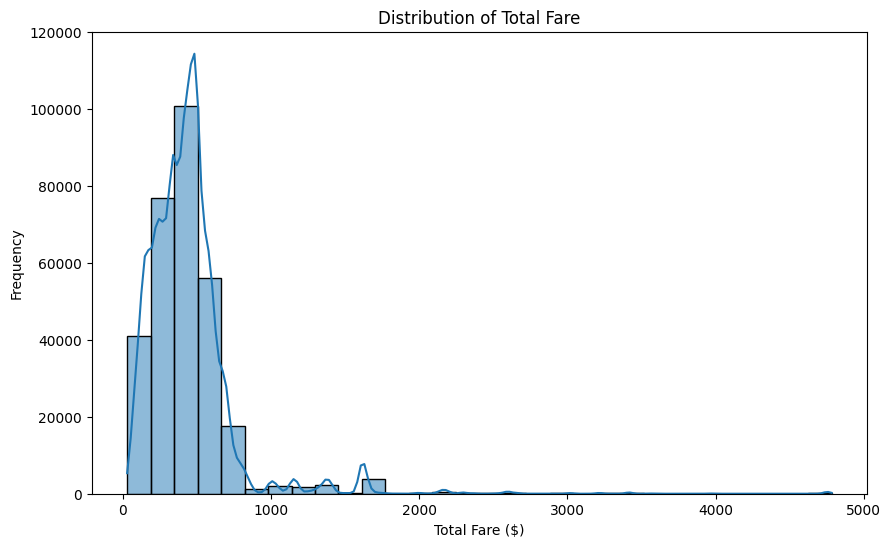

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalFare'], bins=30, kde=True)
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.show()

This histogram shows a right-skewed distribution, indicating that most fares are concentrated in the lower price range, with fewer flights having higher prices.

Before we proceed, let's do a little more data cleaning to take care of categorical variables.

In [51]:
df.segmentsCabinCode.value_counts()

coach            302693
business           1158
first               787
premium coach       612
Name: segmentsCabinCode, dtype: int64

We expect that airline pricing depends on the type of fare you get so we should do an ordinal encoding for that, where coach is the cheapest and first class is the most expensive. Then we want to OneHot encode the other categorical variables (e.g destination airport, airline company, etc.).

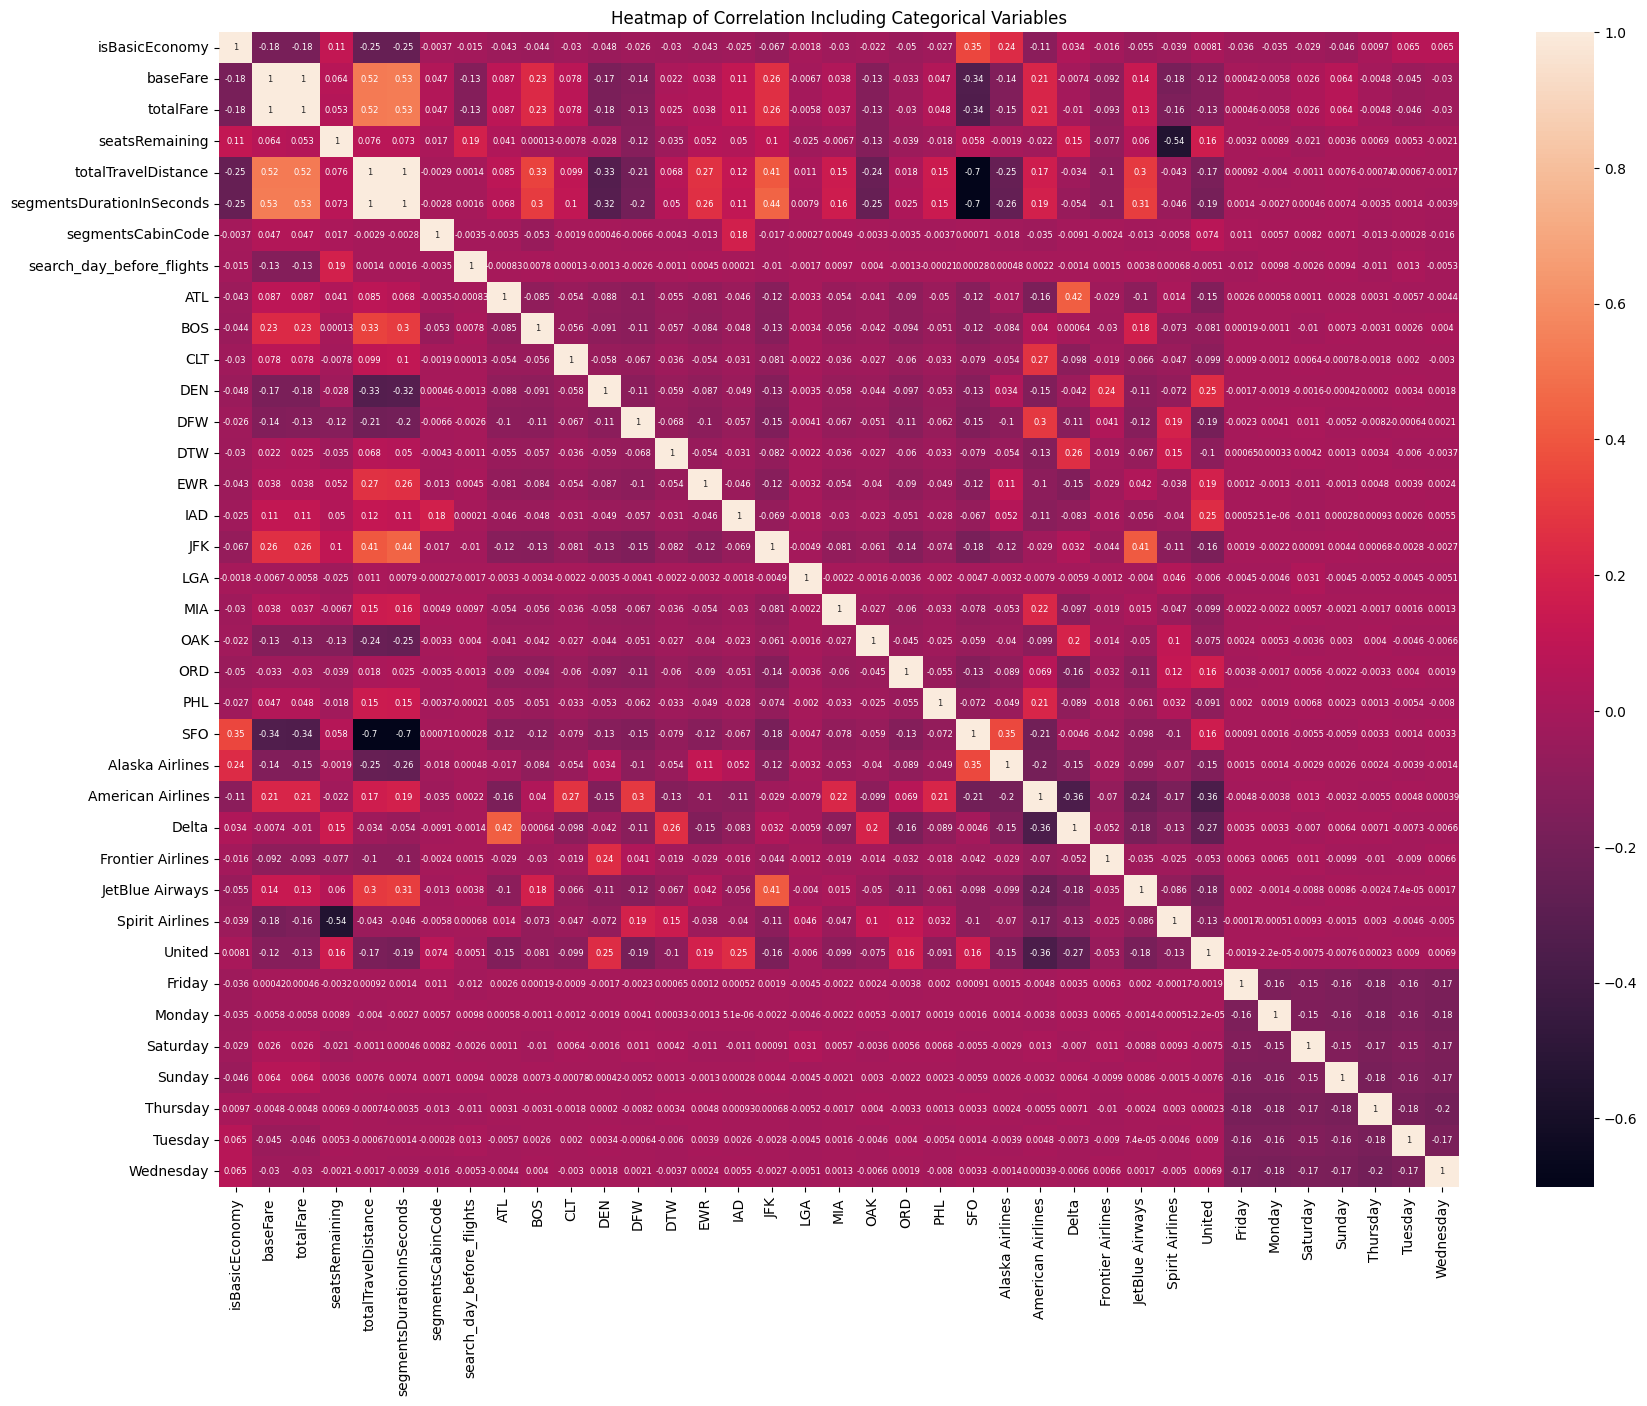

In [7]:
encoded_df=df.copy()
cols_to_encode = ['destinationAirport', 'segmentsAirlineName', "days"]
for col in cols_to_encode:
    dummy = pd.get_dummies(encoded_df[col])
    encoded_df = encoded_df.drop(col, axis=1)
    encoded_df = encoded_df.join(dummy)
cabin_encoder = OrdinalEncoder()
cabins = [["coach"], ["premium coach"], ["business"], ["first"]]
cabin_encoder.fit(cabins)
encoded_df["segmentsCabinCode"] = cabin_encoder.transform(df.segmentsCabinCode.values.reshape(-1, 1))
correlation_matrix_all = encoded_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_all,annot=True,annot_kws={'size': 6})
plt.title('Heatmap of Correlation Including Categorical Variables')
plt.show()

We used ordinal encoding to encoded catgorical varibles and ploted variable correlation heatmap for our data. For this heatmap, we can see flight duration and flight distance have strong positive correlations with our flight price. We also observe that search days before flight and remaining dates have much weaker correlation. Our hypothesis that further/longer flights tend to be more expensive appears to be valdated by the above correlation map, but it doesn't appear as though other variables have a large impact on the price. 

Interestingly, we also see that certain destination airports have higher correlations with the airfare such as JFK and BOS. We also see that certain airlines have higher correlations with the airfare such as JetBlue and American. These make sense as JFK and BOS are on the opposite side of the country and so flights from LAX to these destinations travel far distances. Additionally, JetBlue and American have a lot of hubs on the East coast, far from LAX which could explain their higher correlations.

## Making it Visual

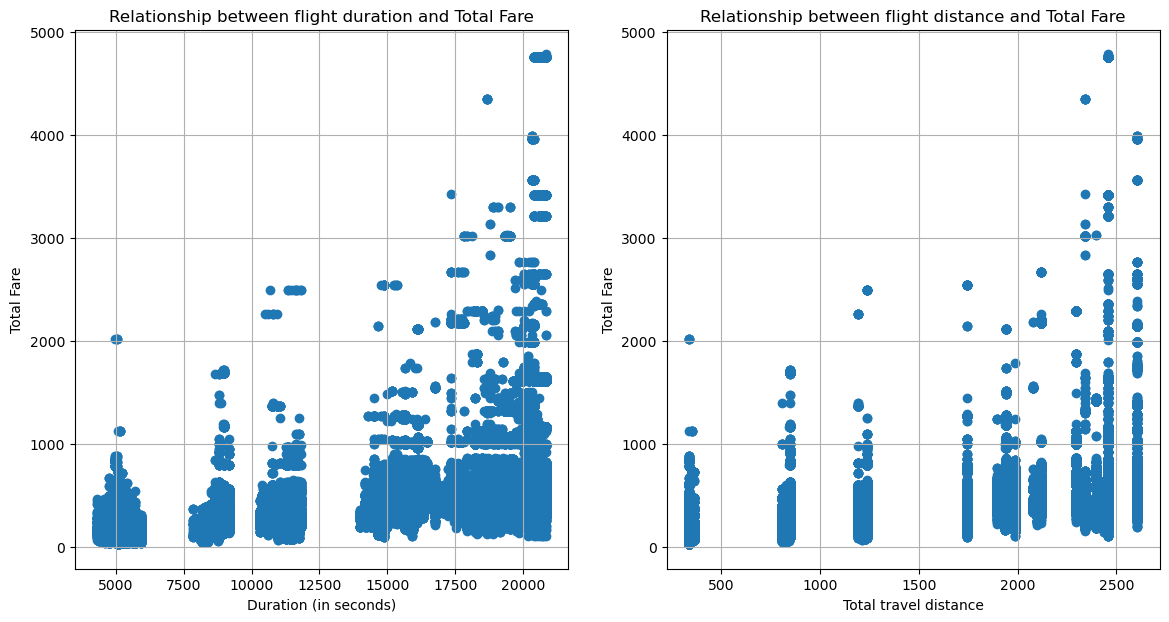

In [53]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(df['segmentsDurationInSeconds'], df['totalFare'])
plt.title('Relationship between flight duration and Total Fare')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Total Fare')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['totalTravelDistance'], df['totalFare'])
plt.title('Relationship between flight distance and Total Fare')
plt.xlabel('Total travel distance')
plt.ylabel('Total Fare')
plt.grid(True)

There appears to be some form of positive correlation in both plots, where both longer travel distance and longer durations tend to be associated with higher total fares. However there are variations that suggest other factors might be influencing the fare besides just the travel duration and travel distance. 


### Lets look at some other variables 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'business'),
  Text(1, 0, 'coach'),
  Text(2, 0, 'first'),
  Text(3, 0, 'premium coach')])

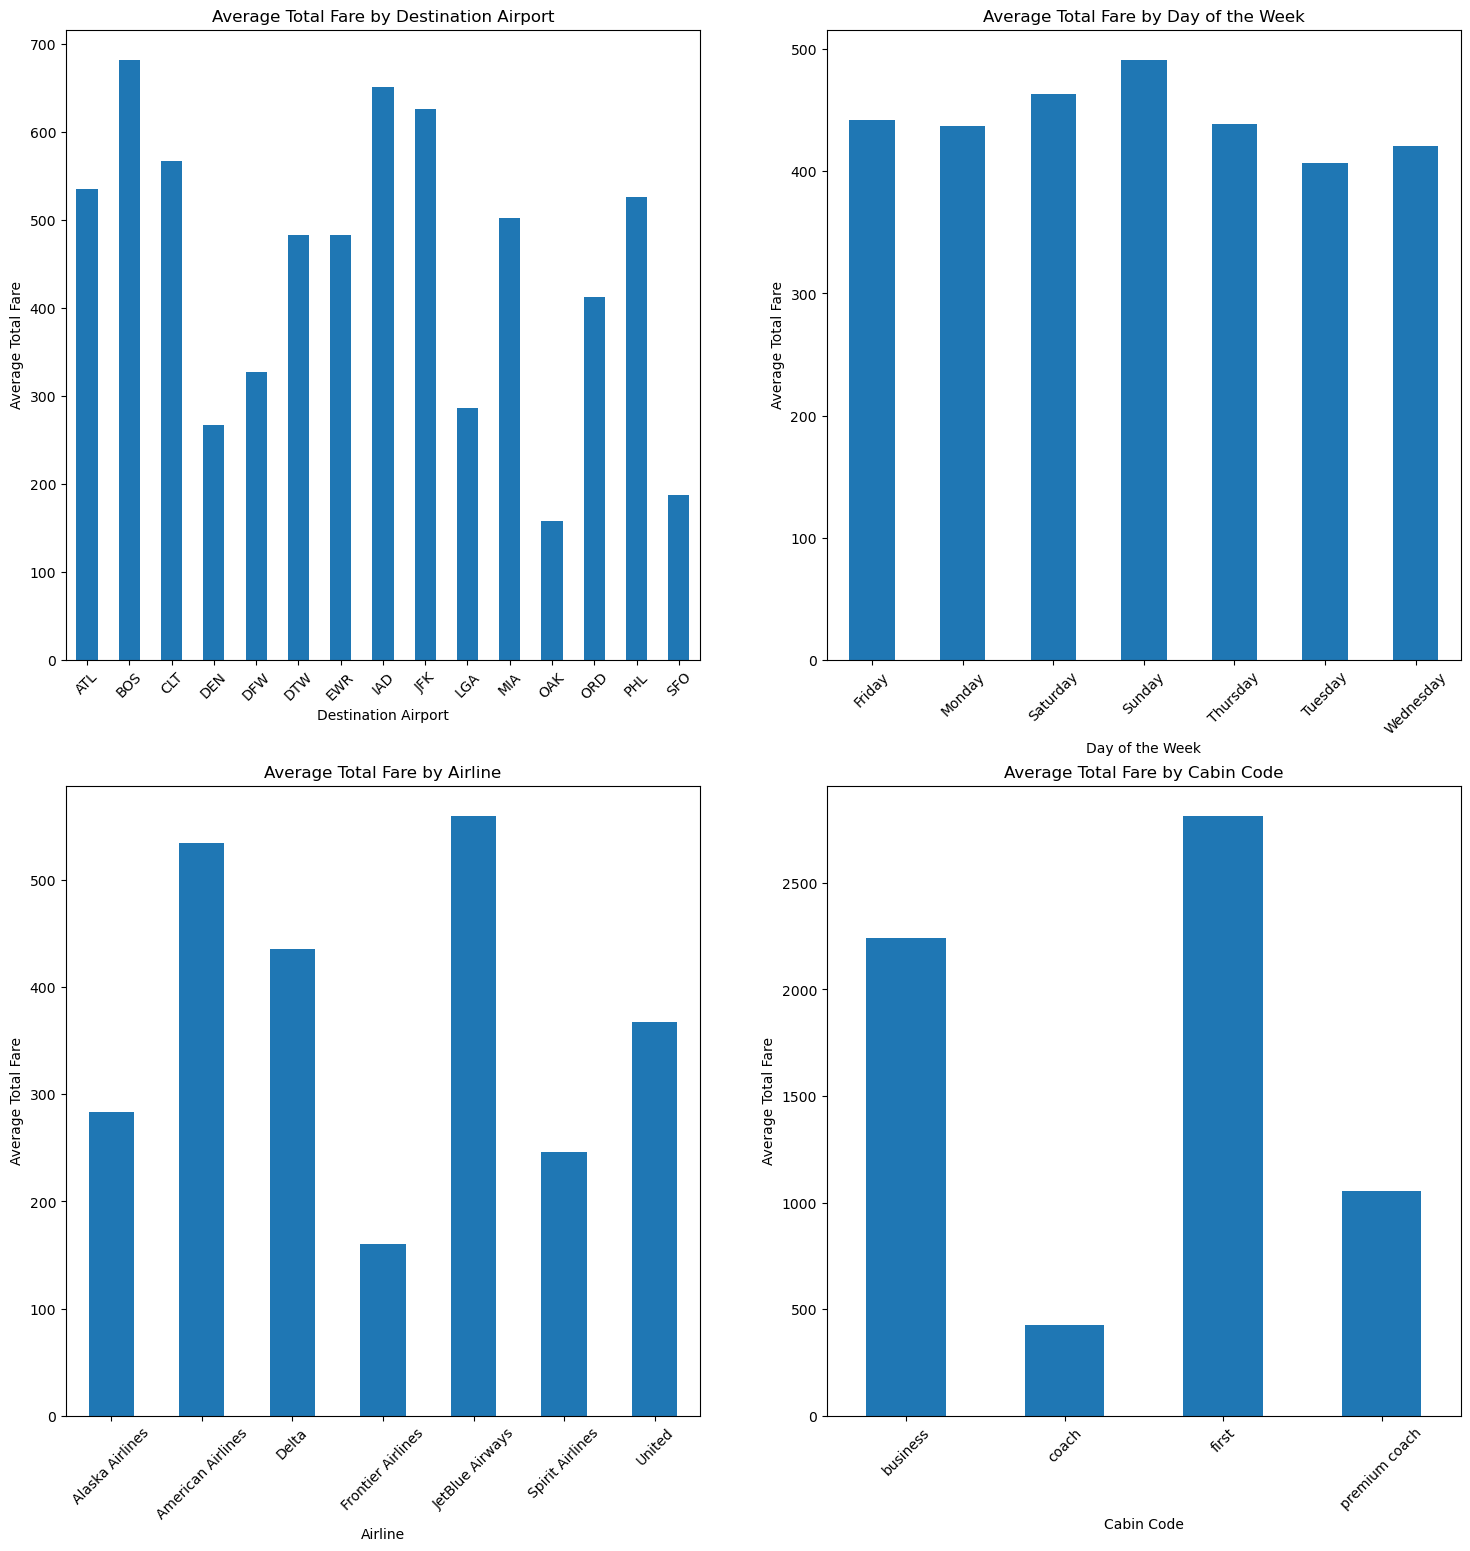

In [54]:
plt.figure(figsize=(18, 18))
plt.subplot(2, 2, 1)
df.groupby('destinationAirport')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
df.groupby('days')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df.groupby('segmentsAirlineName')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df.groupby('segmentsCabinCode')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Cabin Code')
plt.xlabel('Cabin Code')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

Above four graphs showed average flight price in different categories within different variables. For destination airport, we could see flights to BOS, IAD, and JFK tend to have higher price. This may due to BOS, IAD, and JFK are futher from LAX and these destination are more popular, since some destination like PHL and MIA are also far from LAX but the average flight prices are lower than BOS, IAD, and JFK. Destination airport also correlated with total distance and duration of the flight. The flights with destination airport that far from LAX tend to have longer flight duration and distance. For Average Total fare versus Day of week plot, we can see there is no significant difference for average total fare across the week. The flights price are slightly higher in weekends compare to weekdays. Flight price also varies by airlines(American Airlines and JetBlue tend to have higher price) and cabin code(business and first class are more expensive).      

We also see how the higher average fares for airports like BOS and JFK and airlines such as American and JetBlue are reflected in the graph above.

### Lastly, lets see how search date and flight date influnce the flight price

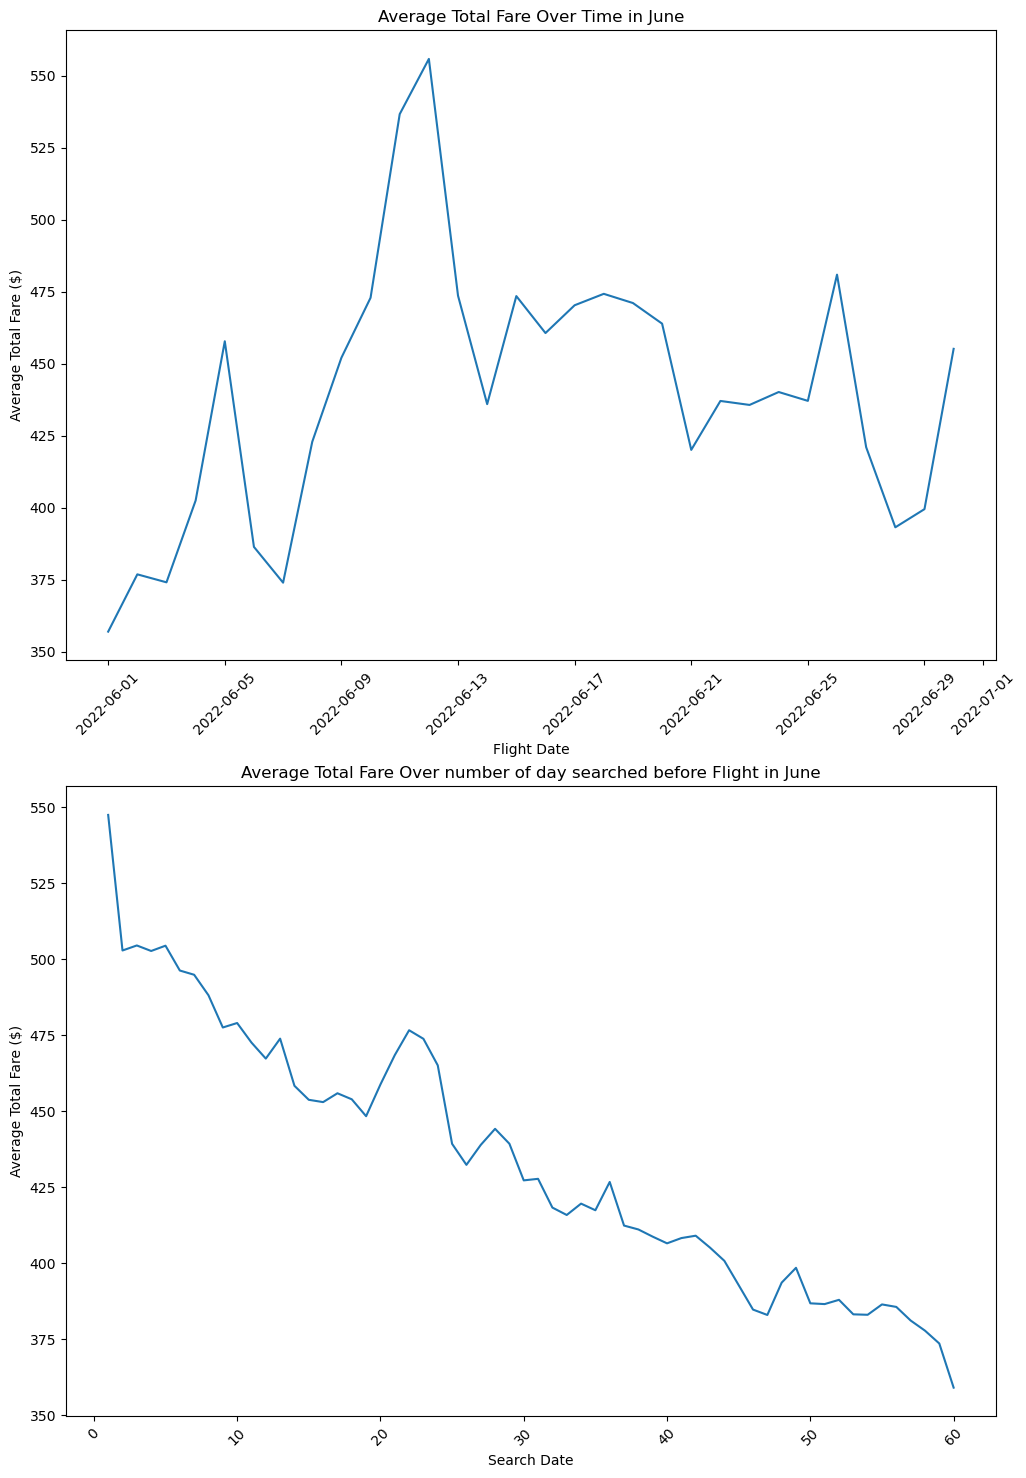

In [55]:
plt.figure(figsize=(12, 18))
plt.subplot(2, 1, 1)
avg_fare_by_date = df.groupby('flightDate')['totalFare'].mean().reset_index()
sns.lineplot(data=avg_fare_by_date, x='flightDate', y='totalFare')
plt.title('Average Total Fare Over Time in June')
plt.xlabel('Flight Date')
plt.xticks(rotation=45)
plt.ylabel('Average Total Fare ($)')

plt.subplot(2, 1, 2)
avg_fare_by_date = df.groupby('search_day_before_flights')['totalFare'].mean().reset_index()
sns.lineplot(data=avg_fare_by_date, x='search_day_before_flights', y='totalFare')
plt.title('Average Total Fare Over number of day searched before Flight in June')
plt.xlabel('Search Date')
plt.xticks(rotation=45)
plt.ylabel('Average Total Fare ($)')
plt.show()

From the above graphs we can see that a) the price of flights tend to increase as time goes on in June and b) the price of flights are cheaper the longer away you search from the departure date.

## Predictive Analysis

In [8]:
# necessary imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

Before, we start training any models, let's first take care of some preperation.

In [9]:
data=encoded_df.copy()
data=data.drop(columns=['segmentsAirlineCode','baseFare','isBasicEconomy','startingAirport','searchDate', "flightDate"])
data.head()

,totalFare,seatsRemaining,totalTravelDistance,segmentsDurationInSeconds,segmentsCabinCode,search_day_before_flights,ATL,BOS,CLT,DEN,...,JetBlue Airways,Spirit Airlines,United,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,198.59,0,1936.100482,15720,1.0,45,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,198.59,0,1936.100482,15780,1.0,45,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,323.60,9,1943.000000,15000,1.0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,323.60,6,1943.000000,15360,1.0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,323.60,2,1943.000000,15540,1.0,45,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Since we took care of most of the data cleaning earlier, we can just use that and drop whatever columns we don't need. Here, we dropped redundant columns that contain similar information to other ones. For example, isBasicEconomy has less information than cabin code, base fare and total fare are the same, etc.

### Baseline model

Here, we train a basic linear regression model using all of the features we selected from above. We will also hold off on doing any transformations for now to see how the model performs.

In [10]:
X = data.drop(columns=['totalFare'])
y = data['totalFare']

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lr_model = LinearRegression().fit(X_train, y_train)

In [12]:
y_train_pred = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test)

In [13]:
train_mae = mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('Training Mean Absolute Error:', train_mae)
print('Training Mean Square Error:', train_mse)
print('Training Root Mean Square Error:', train_r2)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = np.sqrt(mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Training Mean Absolute Error: 125.94524501616009
Training Mean Square Error: 59138.756987442415
Training Root Mean Square Error: 243.1846150303148
Mean Absolute Error: 125.34691392529129
Mean Square Error: 57638.32928164894
Root Mean Square Error: 240.07983939025146


Our root mean squared error is quite high, let's take a look at distribution of prices again and how they compare with our predictions.

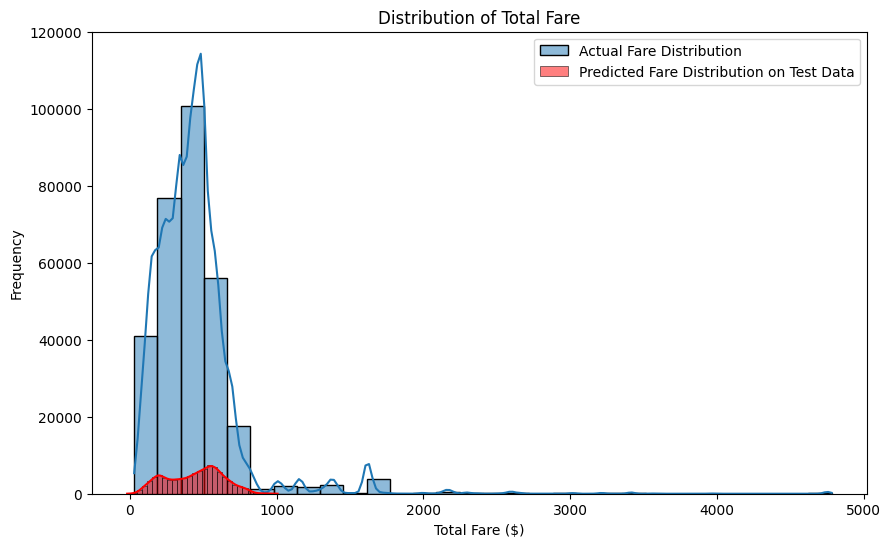

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalFare'], bins=30, kde=True, label='Actual Fare Distribution')
sns.histplot(y_pred, bins=30, kde=True, color="red", label='Predicted Fare Distribution on Test Data')
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Our predictions seem to follow a similar trend, although there does appear to be a bimodal distribution of prices as opposed to a unimodal distribution for the original prices.

### Tuning our Model

Before we proceed further, let's see if a model closer to our hypothesis can perform better. For this model, we will only be using features as outlined in our hypothesis. These include search date, total distance/travel duration and remaining seats available. We'll also do some more feature engineering and apply transformations to see if this improves our results.

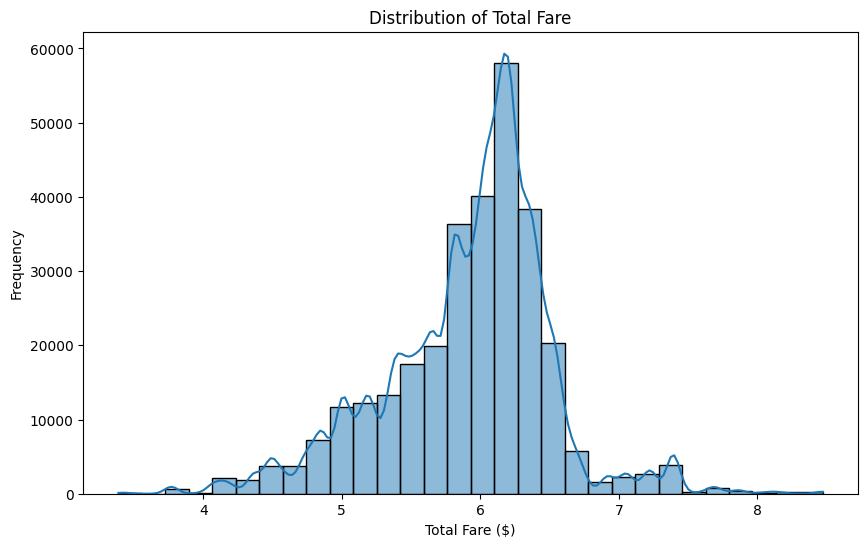

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalFare'].apply(np.log), bins=30, kde=True)
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.show()

After applying a log transformation to our the prices, it appears as though the distribution becomes less skewed. We will be using log-transformed prices for our model moving forward.

In [64]:
simple_data = data[["totalFare", "seatsRemaining", "totalTravelDistance", "search_day_before_flights"]]
simple_X = simple_data.drop(columns="totalFare")
simple_y = simple_data["totalFare"].apply(np.log).to_numpy().reshape(-1, 1) # Applies log transformation to air fare
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(simple_X, simple_y, test_size=0.3)

In [65]:
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)

LinearRegression()

In [66]:
y_train_preds_simple = simple_lr.predict(X_train_simple)
y_preds_simple = simple_lr.predict(X_test_simple)

In [67]:
simple_train_r2 = np.sqrt(
    mean_squared_error(
        np.exp(y_train_simple), 
        np.exp(y_train_preds_simple)
    )
)

print('Training Root Mean Square Error:', simple_train_r2)

simple_r2 = np.sqrt(
    mean_squared_error(
        np.exp(y_test_simple), 
        np.exp(y_preds_simple)
    )
)
print('Root Mean Square Error:', simple_r2)

Training Root Mean Square Error: 260.70404863017825
Root Mean Square Error: 260.6575917984853


While, our root mean square error didn't improve in comparison to our baseline model, the error from this simple model has a pretty close performance despite having a single log transformation and only less information to work with in the way of features.

In [68]:
from sklearn.ensemble import RandomForestRegressor # Setup
from sklearn.model_selection import GridSearchCV

Once again, before proceeding we will get some baseline metrics using our training and testing data from before. We will also be using a RandomForest model as a linear regression may not provide enough complexity for our predictive task.

In [69]:
simple_reg = RandomForestRegressor()
simple_reg.fit(X_train_simple, y_train_simple)

RandomForestRegressor()

In [70]:
simple_preds = simple_reg.predict(X_test_simple)
simple_rmse = np.sqrt(
    mean_squared_error(
        np.exp(simple_preds),
        np.exp(y_test_simple)
    )
)

In [71]:
print("Simple model rmse: ", simple_rmse)

Simple model rmse:  246.36582318917462


From the above, we can see that a) we have made major improvements from our linear regression just by using a more complex model. We can also see that our simple model perhaps does not contain enough information, so we should use more.

Now taking into account everything we have seen so far, let's try and build our final model. We will once again be using a subset of our features and performing a grid search to find the best parameters for our model. However, we will not apply a log transformation as our baseline model had already seen massive improvements without any such transformation.

In [72]:
param_grid = {
    "n_estimators": np.arange(90, 120, 10),
    "max_depth": [5, None],
    "min_samples_split": [2, 5],
    "max_features": ["auto"],
    "criterion": ["squared_error"]
}

Here we initialize a parameter grid, then our grid search algorithm will produce the best combination of hyperparameters for our final model.

Now we will run the algorithm and fit it to our data.

In [73]:
"""
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid=param_grid, n_jobs=-1)
grid.fit(X, y)
""" # Grid Search takes a long time, saved model to pickle instead

'\nmodel = RandomForestRegressor()\ngrid = GridSearchCV(model, param_grid=param_grid, n_jobs=-1)\ngrid.fit(X, y)\n'

Now, after running the grid search, we have a set of "best" parameters for our model. Note, that we put best in quotation marks because we can't reasonably check every single possible combination of features to see what performs the absolute best.

In [74]:
"""
best_params = grid.best_params_
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, y_train)
""" # load model via pickle instead

'\nbest_params = grid.best_params_\nfinal_model = RandomForestRegressor(**best_params)\nfinal_model.fit(X_train, y_train)\n'

In [18]:
with open ("model.pkl", "rb") as f:
    final_model = pickle.load(f, encoding="UTF-8") 

In [19]:
preds = final_model.predict(X_test)

In [20]:
final_mae = mean_absolute_error(y_test, preds)
final_mse = mean_squared_error(y_test, preds)
final_r2 = np.sqrt(mean_squared_error(y_test, preds))

print('Mean Absolute Error:', final_mae)
print('Mean Square Error:', final_mse)
print("Root Mean Square Error:", r2)
print('New Root Mean Square Error:', final_r2)

Mean Absolute Error: 79.59489270414672
Mean Square Error: 22836.64324863279
Root Mean Square Error: 240.07983939025146
New Root Mean Square Error: 151.1179779133932


Our Root Mean Square Error improved significantly which indicates that our model improved significantly over the linear regression model. Let's see how our new predictions stack up.

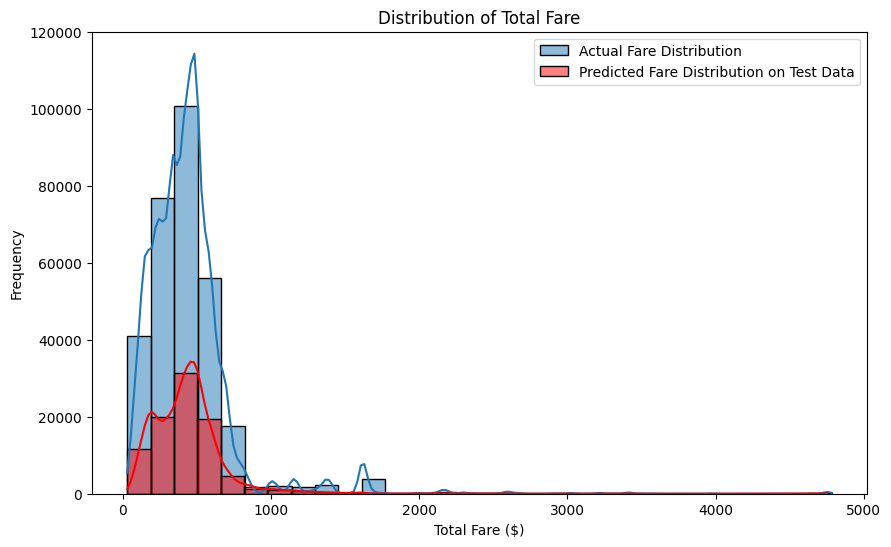

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalFare'], bins=30, kde=True, label='Actual Fare Distribution')
sns.histplot(preds, bins=30, kde=True, color="red", label='Predicted Fare Distribution on Test Data')
plt.title('Distribution of Total Fare')
plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We now also see that our model more closely tracks the distribution of the original data. This is a good sign that our model is able to decently generalize to unseen data. Let's wrap up by seeing how important various features are and bringing it back to our hypothesis.

In [79]:
feature_importances = pd.Series(final_model.feature_importances_, index=X.columns)

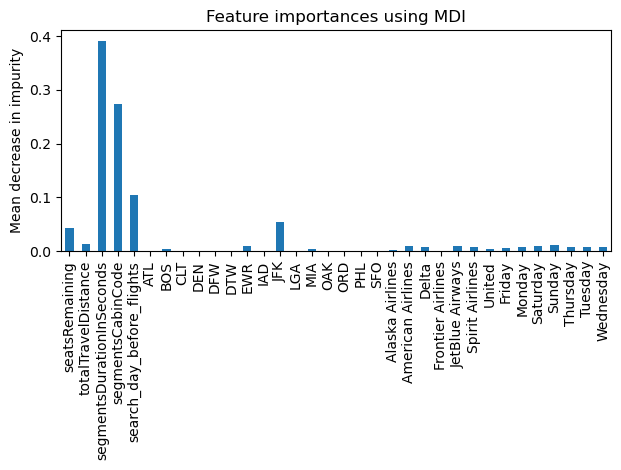

In [80]:
fig, ax = plt.subplots()
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

As we can see, the most important features are the duration of the flight, followed by the cabin code, search day before the flights, the destination being JFK (surprisingly) and remaining seats with everything else following after. We were somewhat correct with our hypothesis. However, it seems that the distance between LAX and the destination doesn't matter nearly as much as we thought it would. In the future, it may make sense to take a deeper dive into how various destination airports affect the air fare. One possible hypothesis is that JFK is one of the busiest airports in the country. As a result it has higher demand than other airports which drives the price of airline tickets up.

# Ethics & Privacy

Our dataset sourced from Expedia which is one of the biggest flight tickets agent in the United States. The proposed dataset for our research questions may include sensitive personal information such as travel itineraries, payment information and demographic information of passengers. To ensure ethical use of the dataset, we will anonymize all personal identifiers before analysis. This includes removing names, contact details, payment information, and travel itinerary to protect individuals' privacy. We recognize that we may need to keep the demographic information for our study, but we will only use this data in investigating travel patterns and behaviors, rather than individual actions.

Moreover, dataset might be subject to biases such as airlines, the pricing algorithms from different website and the date passengers books flights. To addressing potential biases within the dataset, our approach involves conducting thorough exploratory data analysis (EDA) to identify any inherent biases in our dataset. This may include analyzing the distribution of flights across different airlines, the variance in pricing algorithms among various booking websites, and the temporal aspects of flight bookings. 

# Discusison and Conclusion
In conclusion, our analysis agrees with our hypothesis that the factors that most significantly impact the price of flights from LAX to other major U.S airports are the difference between the flight date and search date, and total distance/travel duration to desination. In our analysis, we try to create a machine learning model with our selected variables to predict the flight price and created split data into training and test sets for validation. We then identify the importance for each feature through their weights in the model. We used a simple linear regression model as our basline model. The linear regression model had mean absolute error of 125.35 and root mean square error of 240.08 for validation data. We hope our model could have higher accuarcy for the prediction task, so in our final model, we used random forest regressor with hyper-parameter tuning. Our final model lowered the mean absolute error to 79.5 and root mean square error to 150.99. 

From our feature importances, using mean decrease in impurity plot for our final model, we can see the most important features are the duration of the flight, followed by the cabin code, search day before the flights, the destination being JFK and remaining seats with everything else following after. This conclusion agrees with our hypothesis. From our conclusions, even though some features like flight duration and flights time may not controllable by the consumer, there are some strategies we can apply when booking flights. For example, search day before flights. The eariler we search for flights, the cheaper their air fares will be. Moreover, the destination airports also should be taken into consideration. JFK and LGA are both airports in New York city, but destinations such as JFK have more significant role on influencing the flight pricing. 

Our study provides insight into flights pricing but there still are some limitations. First, cabin code should be a major factor in influencing the flight price intuitively, we should categorize the data based on cabin code and investigate for each cabin code. Moreover, we should also find more data in different years. The pandemic may still be effecting 2022, so integrating data from other years may provide us a more comprehensive understanding for our study. 


# Team Contributions

- Christopher Rebollar-Ramirez
- Licheng Hu: Abstract, Ethics & Privacy, Proposal revision, Discusison and Conclusion, part of EDA, EDA revision, Baseline model.
- Lucien Chen: Background information, part of EDA, simple model, model tuning (e.g feature engineering, transforms, etc.), grid search, final model
- Steven Shi: Proposal Revision, Background information, part of EDA, video script and slides
- Jasdeep Sandhu : Data/Data Checkpoint, Data Checkpoint Revision, Formatting/Editing, Presentation slide edits